In [1]:
import cv2
import os

data_path = 'Dataset'

categories = os.listdir(data_path)               # getting folders

labels = [i for i in range(len(categories))]

label_dict = dict(zip(categories,labels)) 

print(label_dict)
print(categories)
print(labels)

{'healthy': 0, 'tumor': 1}
['healthy', 'tumor']
[0, 1]


In [2]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
    
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            # converting the image into gray scale
            
            resized=cv2.resize(gray,(img_size,img_size))
            # resizing the gray scale into 100x100 , since we need a fixed common size for all the images in the dataset
            
            data.append(resized)
            target.append(label_dict[category])
            # appending the image and the label(categorized) into the list (dataset)
            
        except Exception as e:
            print('Exception: ',e)
            # if any excption raised, then the exception will be printed here and pass to the next image

In [3]:
import numpy as np

data=np.array(data)/255.0         # normalizing


data=np.reshape(data,(data.shape[0],img_size,img_size,1))
print(data.shape)

target=np.array(target)

from tensorflow.keras.utils import to_categorical
# from keras.utils import np_utils

new_target=to_categorical(target)
print(new_target)

(800, 100, 100, 1)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [4]:
new_target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [5]:
np.save('data',data)
np.save('target',new_target)

In [6]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [8]:
model = Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# the first cnn layer followed by relu and maxpooling layers


model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# the second cnn layer followed by relu and maxpooling layers
          
          
model.add(Flatten())
model.add(Dropout(0.5))
# flatten layer to stack the output convolutions from second convolution layer

model.add(Dense(50,activation='relu'))
# dense layer of 50 neurons

model.add(Dense(2,activation='softmax'))
# the final layer with two outputs and two categories

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [13]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras',monitor='val_loss',verbose=1,save_best_only=True,mode='auto')

history = model.fit(train_data,train_target,epochs=5,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6270 - loss: 0.6237
Epoch 1: val_loss improved from inf to 0.31814, saving model to model-001.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.6334 - loss: 0.6189 - val_accuracy: 0.8819 - val_loss: 0.3181
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8588 - loss: 0.3314
Epoch 2: val_loss improved from 0.31814 to 0.24493, saving model to model-002.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8588 - loss: 0.3331 - val_accuracy: 0.9167 - val_loss: 0.2449
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8716 - loss: 0.3255
Epoch 3: val_loss improved from 0.24493 to 0.19767, saving model to model-003.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8731 - loss: 0.3240 - val_accuracy: 0.9236 - val_loss: 0.1977
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9321 - loss: 0.2530
Epoch 4: val_loss did not improve from 0.19767
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1

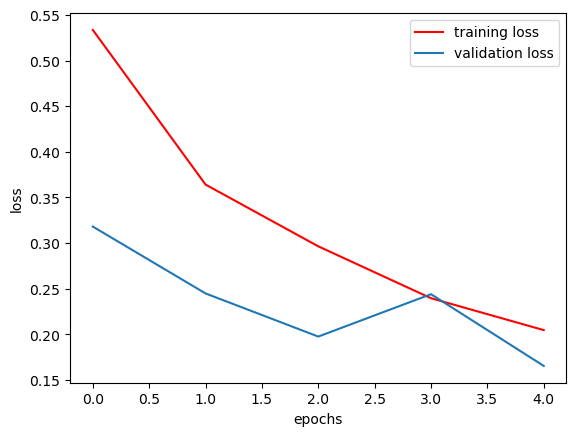

In [14]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

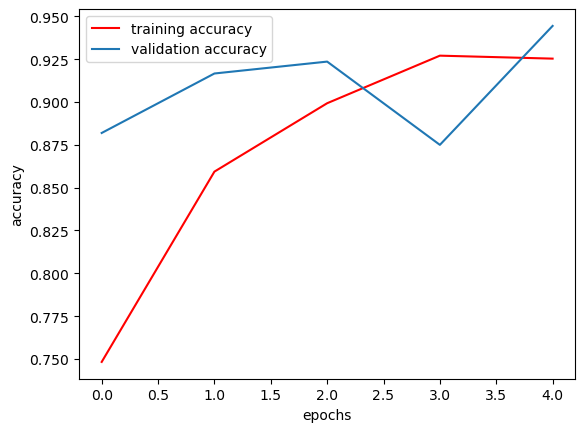

In [15]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [16]:
model.save('braindisease.keras')

In [17]:
model=load_model('braindisease.keras')

# show the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 200)         │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 98, 98, 200)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 200)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 100)         │         180,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 47, 47, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 52900)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 52900)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │       2,645,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,481,758 (32.36 MB)

 Trainable params: 2,827,252 (10.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,654,506 (21.57 MB)

In [18]:
import os
import cv2
from  tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow import keras

In [19]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
model=load_model('braindisease.keras')

In [21]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

h,w= 100,100
img= image.load_img('tumor (1).jpg',target_size=(100,100,3))
                    
imag= cv2.imread('tumor (1).jpg')
gray= cv2.cvtColor(np.float32(img),cv2.COLOR_BGR2GRAY)
out=np.expand_dims(gray,axis=0)
final_img=out/255.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
pred= [[0.04838564 0.9516143 ]]
max index:  1
tumor


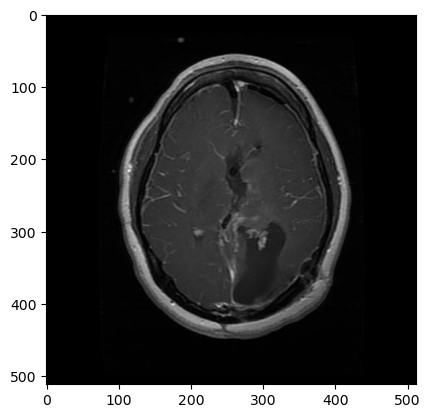

In [23]:
pred= model.predict(final_img)
print('pred=',pred)
max_index=np.argmax(pred[0])
print('max index: ',max_index)
emotions=('healthy','tumor')
predicted_emotion=emotions[max_index]
print(predicted_emotion)
plt.imshow(cv2.cvtColor(imag,cv2.COLOR_BGR2RGB))

plt.show()

In [28]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

h,w= 100,100
img= image.load_img('healthy (1).jpg',target_size=(100,100,3))
                    
imag= cv2.imread('healthy (1).jpg')
gray= cv2.cvtColor(np.float32(img),cv2.COLOR_BGR2GRAY)
out=np.expand_dims(gray,axis=0)
final_img=out/255.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
pred= [[0.74828494 0.25171506]]
max index:  0
healthy


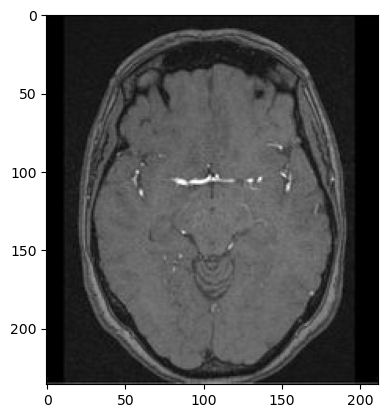

In [29]:
pred= model.predict(final_img)
print('pred=',pred)
max_index=np.argmax(pred[0])
print('max index: ',max_index)
emotions=('healthy','tumor')
predicted_emotion=emotions[max_index]
print(predicted_emotion)
plt.imshow(cv2.cvtColor(imag,cv2.COLOR_BGR2RGB))

plt.show()

In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

h,w= 100,100
img= image.load_img('nature.jpg',target_size=(100,100,3))
                    
imag= cv2.imread('nature.jpg')
gray= cv2.cvtColor(np.float32(img),cv2.COLOR_BGR2GRAY)
out=np.expand_dims(gray,axis=0)
final_img=out/255.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
pred= [[0.9038873  0.09611278]]
max index:  0
healthy


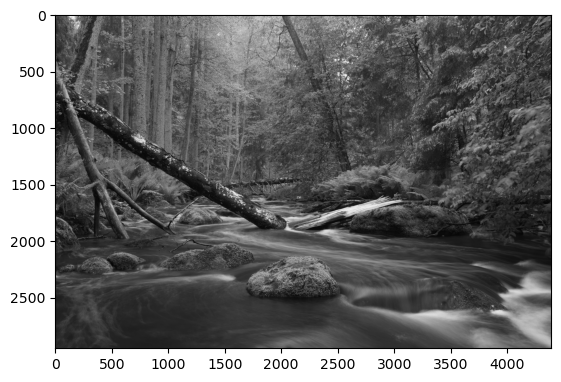

In [31]:
pred= model.predict(final_img)
print('pred=',pred)
max_index=np.argmax(pred[0])
print('max index: ',max_index)
emotions=('healthy','tumor')
predicted_emotion=emotions[max_index]
print(predicted_emotion)
plt.imshow(cv2.cvtColor(imag,cv2.COLOR_BGR2RGB))

plt.show()